In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import catboost as cb
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold

/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
def load_data(path):
    return pd.read_csv(path)

train = load_data("Data/spaceship-titanic/train.csv")
X_test = load_data("Data/spaceship-titanic/test.csv")

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

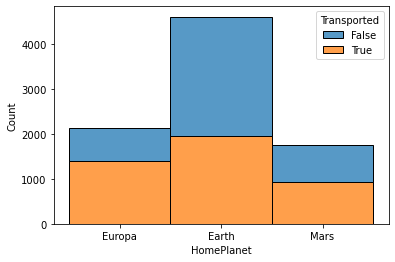

In [8]:
sns.histplot(data = train, x = train['HomePlanet'], hue = train['Transported'], multiple='stack')

In [9]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Count'>

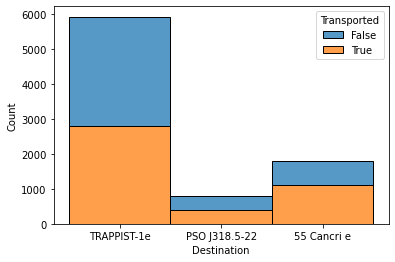

In [12]:
sns.histplot(data = train, x = train['Destination'], hue = train['Transported'], multiple = 'stack')

<AxesSubplot:xlabel='Age', ylabel='Count'>

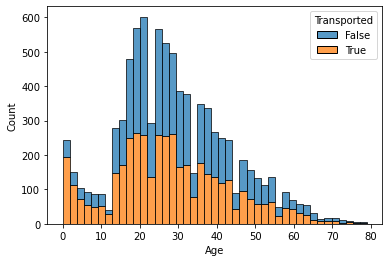

In [13]:
sns.histplot(data = train, x = train['Age'], hue = train['Transported'], multiple = 'stack')

In [14]:
#loop = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#train['TotalSpent'] = train['RoomService'] + train ['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

#sns.histplot(data= train , x=train['TotalSpent'],hue=train['Transported'],multiple='stack')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

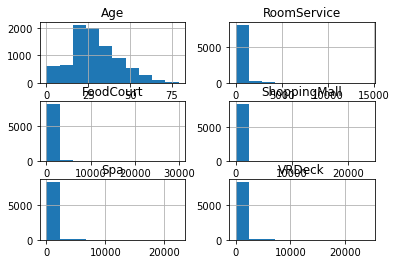

In [15]:
train.hist()

In [16]:
X_train = train.drop(columns=['Name', 'Transported'], axis = 1)
y_train = train['Transported']

In [17]:
y_train.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [18]:
has_slash = X_train['Cabin'].str.contains('/')
print(has_slash.value_counts())

True    8494
Name: Cabin, dtype: int64


In [19]:
def split_Cabin_DS(df):
    df[['Deck', 'Side']] = df['Cabin'].str.split('/', expand=True)[[0, 2]]
    return df

for_only_checking = split_Cabin_DS(X_train)
for_only_checking.Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [20]:
for_only_checking.Side.value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [21]:
# split_Cabin(train)
# loop =['Deck', 'Num', 'Side']

# for i in loop:
    #plt.figure()
    #sns.histplot(data = train, x = train[i], hue = train['Transported'], multiple = 'stack')

# split_PassengerId(train)
# train.head()
# sns.histplot(data = train, x = train['PassengerGroup'], hue = train['Transported'], multiple = 'stack')

# Total_Spending(train)
# sns.histplot(data = train, x = train['TotalSpending'], hue = train['Transported'], multiple = 'stack')

In [22]:
#feuture_engineering = ColumnTransformer([
#    ("total_spending", FunctionTransformer(Total_Spending), 
#     ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
#    ("split_Passenger_id", FunctionTransformer(split_PassengerId),['PassengerId']),
#    ("split_cabin", FunctionTransformer(split_Cabin), ['Cabin']),
#])

In [23]:
X_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S


In [24]:
def split_Cabin_DS(df):
    df[['Deck', 'Side']] = df['Cabin'].str.split('/', expand=True)[[0, 2]]
    df = df.drop('Cabin', axis = 1)
    return df

def split_PassengerId(df):
    df['PassengerGroup'] = df['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)
    df = df.drop("PassengerId", axis = 1)
    return df

def Total_Spending(df):
    df['TotalSpending'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
    #df = df.drop(columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis = 1)
    return df

In [25]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'most_frequent')),
    ("encode", OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ("scale", StandardScaler())
    
])

total_spend_pipline = make_pipeline(
    FunctionTransformer(Total_Spending),
    SimpleImputer(strategy = 'median'),
    StandardScaler()
)

split_cabin_DS_pipeline = make_pipeline(
    FunctionTransformer(split_Cabin_DS),
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

split_pass_id_pipeline = make_pipeline(
    FunctionTransformer(split_PassengerId),
)


In [26]:
preprocessing = ColumnTransformer(transformers = [
        ('numeric_transformers', num_pipeline, ['Age']),
        ('categorical_transformers', cat_pipeline, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']),
        ('split_pass_id', split_pass_id_pipeline, ['PassengerId']),
        ('split_cabin_DS', split_cabin_DS_pipeline, ['Cabin']),
        ('total_spending', total_spend_pipline, ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']),
])

In [27]:
data = preprocessing.fit_transform(X_train)
data.shape

(8693, 28)

In [28]:
X_train.shape

(8693, 14)

In [29]:
y_train.shape

(8693,)

## modeling

#### LogisticRegression

Accuracy:  0.7874159500729716


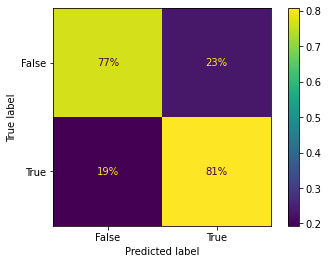

In [30]:
log_reg = Pipeline([
    ("Preprocessing", preprocessing),
    ("model", LogisticRegression(random_state = 42))
])

y_pred = cross_val_predict(log_reg, X_train, y_train, cv = 3)

#cm_log = confusion_matrix(y_train, y_pred)
LogisticReg_acc = cross_val_score(log_reg, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", LogisticReg_acc)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", values_format = ".0%")
plt.show()

#### SVC

Accuracy:  0.7935139744207595


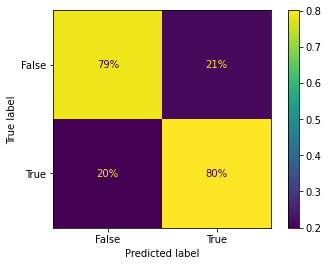

In [31]:
svc_clf = Pipeline([
    ("Preprocessing", preprocessing),
    ("model", SVC(random_state = 42))
])

y_pred = cross_val_predict(svc_clf, X_train, y_train, cv = 3)

SVC_acc = cross_val_score(svc_clf, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", SVC_acc)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", values_format = ".0%")

#### RandomForest

Accuracy:  0.7847706459463749


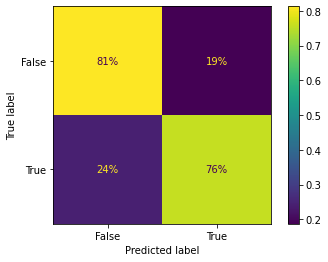

In [32]:
random_forest = Pipeline([
    ("Preprocessing", preprocessing),
    ("model", RandomForestClassifier(random_state = 42))
])

RandomForest_acc = cross_val_score(random_forest, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", RandomForest_acc)

y_pred = cross_val_predict(random_forest, X_train, y_train, cv = 3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", values_format = ".0%")

#### DecisionTree

Accuracy:  0.7395613796238131


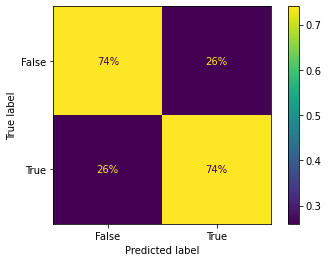

In [33]:
tree_clf = Pipeline([
    ("preprocessing", preprocessing),
    ("model", DecisionTreeClassifier(random_state = 42))
])

DecisionTree_acc = cross_val_score(tree_clf, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", DecisionTree_acc)

y_pred = cross_val_predict(tree_clf, X_train, y_train, cv = 3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", values_format = ".0%")

#### XGBoost

Accuracy:  0.795238944899013


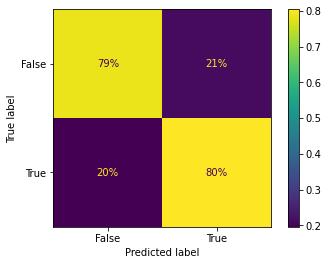

In [34]:
xgb_clf = Pipeline([
    ("preprocessing", preprocessing),
    ("model", xgb.XGBClassifier(objective = "binary:logistic", eval_metric="error", use_label_encoder=False, 
                                                seed = 42, subsample = 0.9, colsample_bytree = 0.5))
])

xgb_acc = cross_val_score(xgb_clf, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", xgb_acc)

y_pred = cross_val_predict(xgb_clf, X_train, y_train, cv = 3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", values_format = ".0%")

#### Catboost

In [35]:
# #Catboost
# catboost_clf = Pipeline([
#     ("preprocessing", preprocessing),
#     ("model", cb.CatBoostClassifier())
# ])

# catboost_clf.fit(X_train, y_train)

# catboost_acc = cross_val_score(catboost_clf, X_train, y_train, cv = 3, scoring = 'roc_auc').mean()
# print("The accuracy of CATBoost is: ", catboost_acc)

In [36]:
# y_pred = cross_val_predict(catboost_clf, X_train, y_train, cv = 5)
# y_pred_bool = [True if x=='True' else False for x in y_pred]
# ConfusionMatrixDisplay.from_predictions(y_train,y_pred_bool)

## Fine tuning the Catboost

In [37]:
# param_grid = {
#     'model__iterations':[700, 800, 900],
#     'model__learning_rate':[0.02, 0.03, 0.04],
#     'model__max_depth':[3, 4, 5, 6],
# }

# gsv_cat = GridSearchCV(estimator = catboost_clf, param_grid = param_grid, cv = 4,
#                        scoring = 'roc_auc', verbose = 0, n_jobs = 10)
# gsv_cat.fit(X_train, y_train)

In [38]:
# gsv_cat.best_params_

In [39]:
# y_pred_es = cross_val_predict(gsv_cat.best_estimator_, X_train, y_train, cv = 5)
# y_pred_bool = [True if x=='True' else False for x in y_pred_es]
# ConfusionMatrixDisplay.from_predictions(y_train,y_pred_bool)

In [40]:
# model_cat = gsv_cat.best_estimator_

In [41]:
# predictions_cat = model_cat.predict(X_test)

## Fine tuning the XGBOOST

In [42]:
param_grid = {
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.002, 0.1],
    'model__gamma': [0, 0.25, 1],
    'model__reg_lambda': [10, 1, 0]
}

gsv = GridSearchCV(estimator = xgb_clf,
                  param_grid = param_grid, scoring = 'roc_auc', verbose = 0, n_jobs = 10, cv = 3)

gsv.fit(X_train, y_train)

/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric_transformers',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('categorical_transformers',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      seed=42, subsample=0.9,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None, ...))]),
             n_jobs=10,
             param_grid={'model__gamma': [0, 0.25, 1],
                         'model__learning_rate': [0.01, 0.002, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__reg_lambda': [10, 1, 0]},
             scoring='roc_auc')

In [43]:
gsv.best_params_

{'model__gamma': 1,
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__reg_lambda': 1}

In [44]:
model_xgb = gsv.best_estimator_

In [45]:
#y_pred = model5.predict(X_train)
xgb_acc = cross_val_score(model_xgb, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", xgb_acc)

Accuracy:  0.7985755712639596


In [46]:
predictions_ = model_xgb.predict(X_test)
predictions_xgb = [True if x == 1 else False for x in predictions_]

## Fine tuning the random forest

In [47]:
param_distr = {'model__n_estimators':randint(low = 90, high = 500),
              'model__max_features': randint(low = 10, high = 30),
              'model__max_leaf_nodes':randint(low = 20, high = 30)}

In [48]:
rnd = RandomizedSearchCV(random_forest,param_distributions = param_distr, cv = 3, n_iter = 10,
                         scoring = "accuracy", random_state = 42)
rnd.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('Preprocessing',
                                              ColumnTransformer(transformers=[('numeric_transformers',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Age']),
                                                                              ('categorical_transformers',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encode',
                                                                                                OneHotEncoder(handle_u...
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'model__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f32f760>,
                                        'model__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f2b10a0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f19d9a0>},
                   random_state=42, scoring='accuracy')

In [49]:
rnd.best_params_

{'model__max_features': 16,
 'model__max_leaf_nodes': 29,
 'model__n_estimators': 304}

In [50]:
model_rf = rnd.best_estimator_

In [51]:
rf_acc = cross_val_score(model_rf, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", rf_acc)

Accuracy:  0.7954695444602544


In [52]:
prediction_rf = model_rf.predict(X_test)

## Fine tuning the SVC

In [53]:
param_distr2 = {'model__C':randint(low = 1, high = 100),
              'model__degree': randint(low = 1, high = 20),
              'model__coef0':randint(low = 1, high = 100)}

rnd2 = RandomizedSearchCV(svc_clf,param_distributions = param_distr2, cv = 3, n_iter = 10,
                         scoring = "accuracy", random_state = 42)
rnd2.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('Preprocessing',
                                              ColumnTransformer(transformers=[('numeric_transformers',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Age']),
                                                                              ('categorical_transformers',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encode',
                                                                                                OneHotEncoder(handle_u...
                                                                                'ShoppingMall',
                                                                                'Spa',
                                                                                'VRDeck'])])),
                                             ('model', SVC(random_state=42))]),
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f40a1c0>,
                                        'model__coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f40afd0>,
                                        'model__degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14f483be0>},
                   random_state=42, scoring='accuracy')

In [54]:
rnd2.best_params_

{'model__C': 2, 'model__coef0': 64, 'model__degree': 1}

In [55]:
model_svc = rnd2.best_estimator_

In [56]:
SVC_acc_new = cross_val_score(model_svc, X_train, y_train, cv = 3, scoring = "accuracy").mean()

print("Accuracy: ", SVC_acc_new)

Accuracy:  0.7938588017605293


In [57]:
prediction_svc = model_svc.predict(X_test)

In [59]:
# sub = pd.DataFrame({
#         "PassengerId": X_test.PassengerId,
#         "Transported": predictions_cat})
# sub.to_csv('spaceShipSubCat.csv', index=False)